In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cProfile
from scipy.sparse.linalg import cg

## Zadanie 1

In [12]:
def gen_hilbert(n, dtype=np.float64):
    A = np.zeros((n,n), dtype=dtype)
    for i in range(n):
        for j in range(n):
            A[i,j] = 1.0/(i+j+1)
    return A

In [13]:
def iter_popr(A32, A64, b32, b64, iter=10):
    x = np.linalg.solve(A32, b32).astype(np.float64)
    print(x)
    u = np.finfo(np.float32).eps

    for i in range(iter):
        r = b64 - A64 @ x
        r_inf = np.linalg.norm(r, np.inf)
        if r_inf <= np.linalg.norm(A64 @ x, np.inf)*u or \
           r_inf <= np.linalg.norm(b64, np.inf)*u:
            print(f"Przerwano po {i+1} iteracjach — spełniono warunek.")
            return x
        
        dx = np.linalg.solve(A32, r.astype(np.float32)).astype(np.float64)

        x = x + dx

    print("Osiągnięto maksymalną liczbę iteracji.")
    return x

In [15]:
A32_1 = gen_hilbert(5, np.float32)
b32_1 = np.array([5,4,3,2,1], dtype=np.float32)
print(A32_1)

A64_1 = gen_hilbert(5, np.float64)
b64_1 = np.array([5,4,3,2,1], dtype=np.float64)
print(A64_1)

x_dok_1 = iter_popr(A32_1, A64_1, b32_1, b64_1)

print(x_dok_1)

[[1.         0.5        0.33333334 0.25       0.2       ]
 [0.5        0.33333334 0.25       0.2        0.16666667]
 [0.33333334 0.25       0.2        0.16666667 0.14285715]
 [0.25       0.2        0.16666667 0.14285715 0.125     ]
 [0.2        0.16666667 0.14285715 0.125      0.11111111]]
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
[   -94.84781647   2157.10131836 -10697.32226562  17900.65820312
  -9440.46484375]
Przerwano po 2 iteracjach — spełniono warunek.
[   -94.99983622   2159.99688816 -10709.98640347  17919.97926712
  -9449.98978233]


## Zadanie 2

In [26]:
def gen_matrix(n=20):
    A = np.zeros((n,n))
    for i in range(n):
        A[i,i] = 4
        if i-1 >=0:
            A[i, i-1] = -1
        if i+1 < n:
            A[i, i+1] = -1
    A[0][n-1] = 1
    A[n-1][0] = 1
    return A

def gauss_seidel(A, b, delta=1e-10, max_iter=10000):
    n = len(b)
    x = np.zeros(n)

    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i, i]

        r = A @ x - b
        if np.linalg.norm(x - x_old, np.inf) < delta and np.linalg.norm(r, np.inf)/np.linalg.norm(b, np.inf) < delta:
            print(f"Przerwano po {k+1} iteracjach — rozwiązanie zbieżne.")
            return x
    print("Osiągnięto maksymalną liczbę iteracji.")
    return x

In [27]:
n = 20
b_2 = np.zeros(n)
b_2[-1] = 100
A_2 = gen_matrix(20)
print(A_2)



[[ 4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [-1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  4. -1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  4. -1.  0.  0.  0.

In [30]:
x_2 = gauss_seidel(A_2, b_2)
print(x_2)

Przerwano po 24 iteracjach — rozwiązanie zbieżne.
[-7.73502692e+00 -2.07259421e+00 -5.55349941e-01 -1.48805549e-01
 -3.98722562e-02 -1.06834754e-02 -2.86164519e-03 -7.63105390e-04
 -1.90776352e-04 -4.32077955e-12  1.90776342e-04  7.63105379e-04
  2.86164518e-03  1.06834753e-02  3.98722562e-02  1.48805549e-01
  5.55349941e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]


## Zadanie 3

In [35]:
x_2_linalg, _ = cg(A_2, b_2)
print(x_2_linalg)

error = np.linalg.norm(x_2_linalg-x_2, np.inf)
print(error)

[-7.73502692e+00 -2.07259421e+00 -5.55349941e-01 -1.48805549e-01
 -3.98722562e-02 -1.06834753e-02 -2.86164518e-03 -7.63105381e-04
 -1.90776345e-04  0.00000000e+00  1.90776345e-04  7.63105381e-04
  2.86164518e-03  1.06834753e-02  3.98722562e-02  1.48805549e-01
  5.55349941e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]
2.1105006631216838e-11


In [43]:
cProfile.run("gauss_seidel(A_2, b_2)")

Przerwano po 24 iteracjach — rozwiązanie zbieżne.
         1296 function calls (1294 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 3550904679.py:13(gauss_seidel)
        1    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
       26    0.000    0.000    0.000    0.000 _methods.py:39(_amax)
        1    0.000    0.000    0.000    0.000 attrsettr.py:43(__getattr__)
        1    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        1    0.000    0.000    0.001    0.001 base_events.py:1909(_run_once)
        1    0.000    0.000    0.000    0.000 base_events.py:734(time)
        4    0.000    0.000    0.000    0.000 enum.py:1129(__new__)
        9    0.00

In [38]:
cProfile.run("cg(A_2, b_2)")

         426 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
       10    0.000    0.000    0.000    0.000 _base.py:1513(issparse)
        2    0.000    0.000    0.000    0.000 _interface.py:146(__new__)
        2    0.000    0.000    0.000    0.000 _interface.py:161(__init__)
       10    0.000    0.000    0.000    0.000 _interface.py:193(_matvec)
       20    0.000    0.000    0.000    0.000 _interface.py:205(matvec)
       10    0.000    0.000    0.000    0.000 _interface.py:307(matmat)
        1    0.000    0.000    0.000    0.000 _interface.py:793(__init__)
       10    0.000    0.000    0.000    0.000 _interface.py:799(_matmat)
        1    0.000    0.000    0.000    0.000 _interface.py:823(__init__)
       10    0.000    0.000    0.000    0.000 _interface.py:826(_matvec)
        1    0.000    0.000    0.000    0.000 _interface.

## Zadanie 4

In [39]:
def gen_B(n=20):
    B = np.zeros((n, n))
    a = 0.025
    B[0, 0] = a
    for i in range(1, n):
        a += 0.025
        B[i, i] = a
        B[i-1, i] = 5
    return B

B = gen_B()
print(B)

x0 = np.ones(20)
print(x0)

[[0.025 5.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.05  5.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.075 5.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.1   5.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.125 5.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.15  5.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.175 5.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.2   5.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.  

In [64]:
def calc_eta(B, x0, max_iter=100):
    x0_norm = np.linalg.norm(x0, 2)
    x = x0.copy()
    eta = np.zeros(max_iter)
    for k in range(max_iter):
        x = B @ x
        eta[k] = np.linalg.norm(x, 2)/x0_norm
    
    return eta

[5.12002808e+00 2.62148838e+01 1.34147330e+02 6.85711167e+02
 3.49945122e+03 1.78211578e+04 9.05157523e+04 4.58278160e+05
 2.31150113e+06 1.16071576e+07 5.79792843e+07 2.87800015e+08
 1.41771153e+09 6.91719364e+09 3.33324266e+10 1.57900411e+11
 7.29295739e+11 3.22951689e+12 1.31284196e+13 4.01633280e+13
 9.09613025e+13 1.61846453e+14 2.38997189e+14 3.04956674e+14
 3.46149675e+14 3.57064219e+14 3.40154204e+14 3.03004054e+14
 2.54869642e+14 2.04032807e+14 1.56451210e+14 1.15519790e+14
 8.25005342e+13 5.72012495e+13 3.86267339e+13 2.54738287e+13
 1.64457526e+13 1.04150860e+13 6.48195939e+12 3.97076996e+12
 2.39761139e+12 1.42876487e+12 8.41209267e+11 4.89825219e+11
 2.82332111e+11 1.61217066e+11 9.12659981e+10 5.12554482e+10
 2.85735017e+10 1.58203195e+10 8.70383172e+09 4.76042429e+09
 2.58940875e+09 1.40132932e+09 7.54772166e+08 4.04731391e+08
 2.16133236e+08 1.14973627e+08 6.09405338e+07 3.21919095e+07
 1.69517025e+07 8.90005744e+06 4.65978372e+06 2.43336361e+06
 1.26761144e+06 6.588217

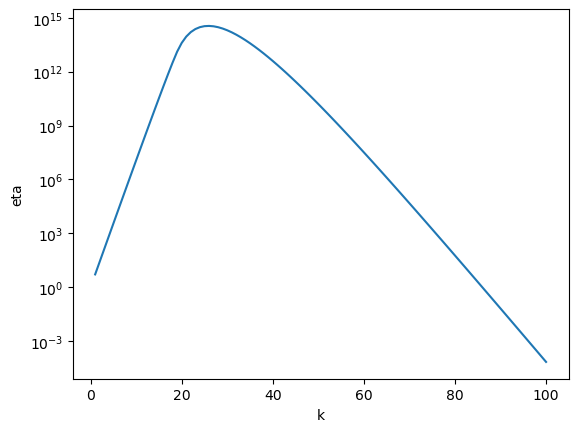

In [134]:
eta = calc_eta(B, x0)
print(eta)

plt.plot(np.arange(1, 101), eta)
plt.xlabel("k")
plt.ylabel("eta")
plt.yscale("log")

In [87]:
for k in range(1, len(eta)):
    if eta[k] < eta[k-1]:
        print("eta zaczyna maleć od iteracji:", k)
        break

for k in range(len(eta)):
    if eta[k] < 1:
        print("najmniejsze k dla którego norma jest mniejsza od normy x0:", k+1)
        break

eta zaczyna maleć od iteracji: 26
najmniejsze k dla którego norma jest mniejsza od normy x0: 86
